# Gallery

The gallery contains standard plots you can make with the `crdb` Python library, that you can install with `pip install crdb`.

In [1]:
import crdb
import matplotlib.pyplot as plt
import numpy as np

## Boron to carbon ratio

We plot all data on B/C ratios in the DB and plot different experiments in different colors.

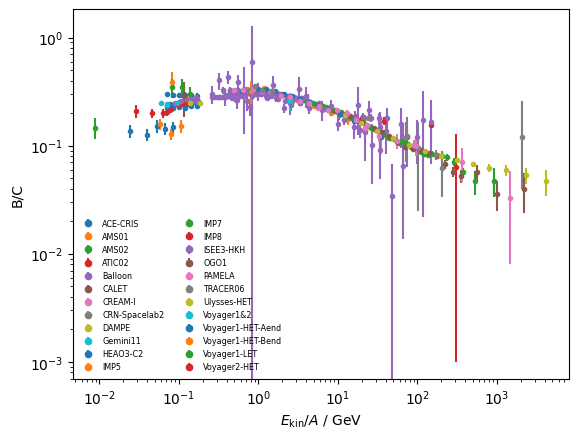

In [2]:
tab = crdb.query("B/C", energy_type="EKN")

# plot each experiment with different color
for i, (exp, mask) in enumerate(crdb.experiment_masks(tab).items()):
    t = tab[mask]
    if len(t) == 0:
        continue
    sta = ([np.abs(t["err_stat_minus"]), t["err_stat_plus"]])
    plt.errorbar(t["e_mean"], t["value"], sta, fmt=".", label=exp)

plt.legend(ncol=2, frameon=False, fontsize="xx-small", markerscale=1.5)
plt.xlabel("$E_\\mathrm{kin} / A$ / GeV")
plt.ylabel("B/C")
plt.loglog();

Now we show only experiments which have published both statistical and systematic uncertainties. This is an effective way to remove old data of uncertain quality.

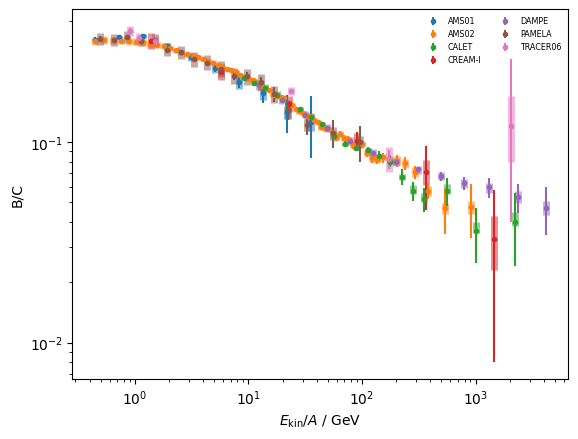

In [3]:
tab = crdb.query("B/C", energy_type="EKN")

for (exp, mask) in crdb.experiment_masks(tab).items():
    t = tab[mask]
    y = t["value"]
    if np.all(t["err_stat_plus"] == 0) or np.all(t["err_sys_plus"] == 0):
        continue
    l = plt.errorbar(t["e_mean"], y, (t["err_stat_minus"], t["err_stat_plus"]),
                     fmt=".", label=exp)[0]
    plt.errorbar(t["e_mean"], y, (t["err_sys_minus"], t["err_sys_plus"]),
                 fmt="none", lw=5, color=l.get_color(), alpha=0.5, zorder=0)

plt.legend(ncol=2, frameon=False, fontsize="xx-small")
plt.xlabel("$E_\\mathrm{kin} / A$ / GeV")
plt.ylabel("B/C")
plt.loglog();

You can generate a list of URLs to the papers for the current table.

In [4]:
for url in crdb.reference_urls(tab):
    print(url)

https://ui.adsabs.harvard.edu/abs/1966JGR....71.1771B
https://ui.adsabs.harvard.edu/abs/1967JGR....72.5957W
https://ui.adsabs.harvard.edu/abs/1969Ap%26SS...3...80V
https://ui.adsabs.harvard.edu/abs/1970PhRvD...1.1021D
https://ui.adsabs.harvard.edu/abs/1972Ap%26SS..15..245W
https://ui.adsabs.harvard.edu/abs/1972ApJ...171..139M
https://ui.adsabs.harvard.edu/abs/1974ApJ...191..331J
https://ui.adsabs.harvard.edu/abs/1975ApJ...202..265G
https://ui.adsabs.harvard.edu/abs/1977Ap%26SS..47..163M
https://ui.adsabs.harvard.edu/abs/1978ApJ...223..676L
https://ui.adsabs.harvard.edu/abs/1978ApJ...226.1147O
https://ui.adsabs.harvard.edu/abs/1979ICRC...12...51W
https://ui.adsabs.harvard.edu/abs/1980ApJ...239..712S
https://ui.adsabs.harvard.edu/abs/1985ICRC....2...16W
https://ui.adsabs.harvard.edu/abs/1987ApJ...322..981D
https://ui.adsabs.harvard.edu/abs/1987ApJS...64..269G
https://ui.adsabs.harvard.edu/abs/1988ApJ...328..940K
https://ui.adsabs.harvard.edu/abs/1990A%26A...233...96E
https://ui.adsabs.ha

## Electron and positron fluxes

Electron points are filled, positron points are open.

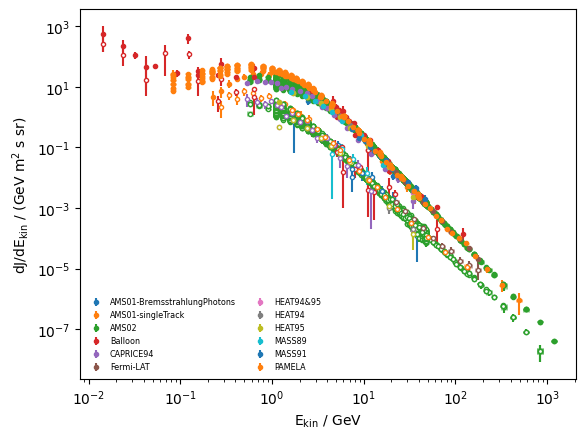

In [5]:
tab = crdb.query(("e-", "e+"), energy_type="EK", energy_convert_level=2)

plt.figure()
for iexp, (exp, mask) in enumerate(crdb.experiment_masks(tab).items()):
    t = tab[mask]
    for k, ma in enumerate((t["quantity"] == "e-", t["quantity"] == "e+")):
        t2 = t[ma]
        color = f"C{iexp}"
        x = t2["e_mean"]
        l = plt.errorbar(x, t2["value"], (t2["err_stat_minus"], t2["err_stat_plus"]),
                         fmt=".",
                         color="w" if k else color, mec=color, ecolor=color,
                         label=f"{exp}" if k == 0 else None)[0]
        plt.errorbar(x, t2["value"], (t2["err_sys_minus"], t2["err_sys_plus"]),
                     color="none", ecolor=color, lw=5, alpha=0.5)
plt.xlabel("E$_\\mathrm{kin}$ / GeV")
plt.ylabel("dJ/dE$_\\mathrm{kin}$ / (GeV m$^2$ s sr)")
plt.legend(frameon=False, fontsize="xx-small", ncol=2, loc="lower left")
plt.loglog();

In [6]:
for url in crdb.reference_urls(tab):
    print(url)

https://ui.adsabs.harvard.edu/abs/1968ApJ...152..783F
https://ui.adsabs.harvard.edu/abs/1969ApJ...158..771F
https://ui.adsabs.harvard.edu/abs/1969PhRvL..22..412B
https://ui.adsabs.harvard.edu/abs/1975ApJ...199..669B
https://ui.adsabs.harvard.edu/abs/1976ApJ...204..927H
https://ui.adsabs.harvard.edu/abs/1984ApJ...287..622G
https://ui.adsabs.harvard.edu/abs/1987A%26A...188..145G
https://ui.adsabs.harvard.edu/abs/1994ApJ...436..769G
https://ui.adsabs.harvard.edu/abs/1998ApJ...498..779B
https://ui.adsabs.harvard.edu/abs/2000ApJ...532..653B
https://ui.adsabs.harvard.edu/abs/2000PhLB..484...10A
https://ui.adsabs.harvard.edu/abs/2001ApJ...559..296D
https://ui.adsabs.harvard.edu/abs/2002A%26A...392..287G
https://ui.adsabs.harvard.edu/abs/2007PhLB..646..145A
https://ui.adsabs.harvard.edu/abs/2011PhRvL.106t1101A
https://ui.adsabs.harvard.edu/abs/2012PhRvL.108a1103A
https://ui.adsabs.harvard.edu/abs/2013PhRvL.111h1102A
https://ui.adsabs.harvard.edu/abs/2014PhRvL.113l1102A
https://ui.adsabs.harvar

# Elemental fluxes

We plot the fluxes of several elements, electrons and positrons, and the all-particle flux measured by air shower experiments, which cannot distinguish individual elements.

We skip data points without published systematic uncertainties. We further skip data points with more than 50 % statistical uncertainty.

The plot on the left(right)-hand side shows the flux scaled with $E$ ($E^{2.6}$). Flux levels are shown with different shades of gray for reference. One can see that direct measurements, which typically have apertures around 1 square-meter, stop to be practical when the flux drops below the threshold of 1 event per square-meter and day.

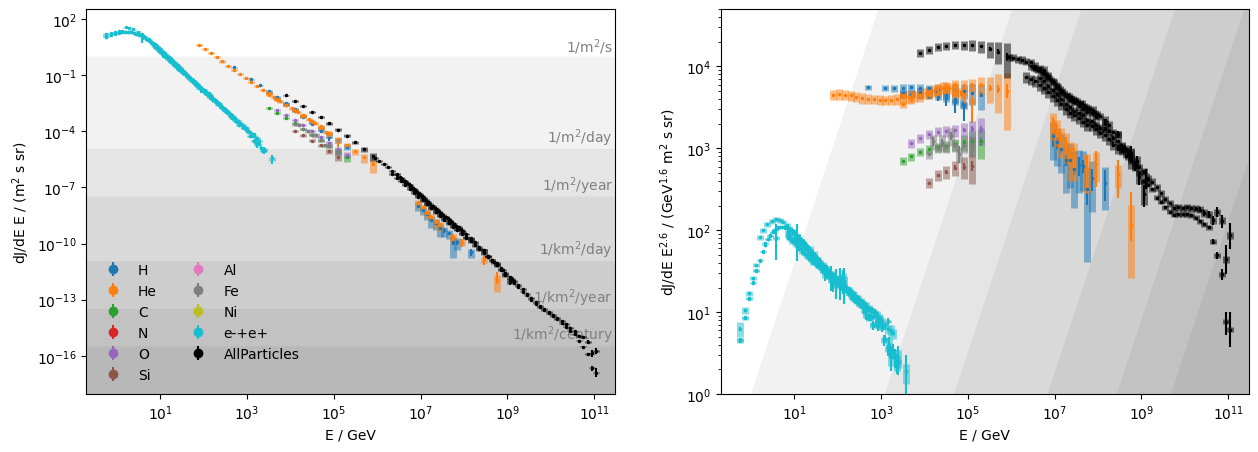

In [7]:
elements = ("H", "He", "C", "N", "O", "Si", "Al", "Fe", "Ni", "e-+e+", "AllParticles")

tab = crdb.query(elements, energy_type="ETOT", energy_convert_level=1)
with np.errstate(divide="ignore"):
    mask = (tab["err_stat_minus"] > 0) & (tab["err_sys_minus"] > 0) & (tab["err_stat_minus"] / tab["value"] < 0.5)
tab = tab[mask]

exponents = (1, 2.6)

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
for exponent, axi in zip(exponents, ax):
    plt.sca(axi)
    for ielem, elem in enumerate(elements):
        ma = tab["quantity"] == elem
        t = tab[ma]
        x = t["e_mean"]
        y = t["value"]
        f = x ** exponent
        color = f"C{ielem}" if elem != "AllParticles" else "k"
        plt.errorbar(x, y * f, (t["err_stat_minus"] * f, t["err_stat_plus"] * f),
                    fmt=".", ms=3, color=color, label=elem)
        plt.errorbar(x, y * f, (t["err_sys_minus"] * f, t["err_sys_plus"] * f),
                    color="none", ecolor=color, lw=5, alpha=0.5)
        if exponent == 1:
            plt.ylabel(f"dJ/dE E / (m$^2$ s sr)")
        else:
            plt.ylabel(f"dJ/dE E$^{{{exponent}}}$ / (GeV$^{{{exponent - 1}}}$ m$^2$ s sr)")

m = 1
km = 1e3 * m
s = 1
hour = 60 ** 2 * s
day = 24 * hour
month = 30 * day
year = 356 * day
century = 100 * year
x = np.geomspace(2e-1, 3e11, 1000)
for exponent, axi in zip(exponents, ax):
    axi.loglog();
    axi.set_xlabel("E / GeV")
    axi.set_xlim(x[0], x[-1])
    for flux_ref in ("1/m^2/s", "1/m^2/day", "1/m^2/year", "1/km^2/day", "1/km^2/year", "1/km^2/century"):
        v = eval(flux_ref.replace("^2", "**2"))
        label = flux_ref.replace("^2", "$^2$")
        y = v * x ** (exponent - 1)
        axi.fill_between(x, y, color="k", zorder=0, alpha=0.05, lw=0)
        if axi is ax[0]:
            axi.text(x[-1] * 0.9, y[-1] * 1.1, label, va="bottom", ha="right", 
                     color="0.5", zorder=0)

ax[0].legend(frameon=False, ncol=2, loc="lower left", markerscale=4)
ax[1].set_ylim(1, 5e4);

In [8]:
for url in crdb.reference_urls(tab):
    print(url)

https://ui.adsabs.harvard.edu/abs/2007PhLB..646..145A
https://ui.adsabs.harvard.edu/abs/2007PhRvD..75d2004A
https://ui.adsabs.harvard.edu/abs/2010PhRvD..82i2004A
https://ui.adsabs.harvard.edu/abs/2011ApJ...728..122Y
https://ui.adsabs.harvard.edu/abs/2012PhRvL.108a1103A
https://ui.adsabs.harvard.edu/abs/2013PhRvL.111h1102A
https://ui.adsabs.harvard.edu/abs/2014NIMPA.756...94P
https://ui.adsabs.harvard.edu/abs/2014PhRvL.113v1102A
https://ui.adsabs.harvard.edu/abs/2015ICRC...34..263S
https://ui.adsabs.harvard.edu/abs/2015ICRC...34..334R
https://ui.adsabs.harvard.edu/abs/2015ICRC...34..349I
https://ui.adsabs.harvard.edu/abs/2015arXiv150903732T
https://ui.adsabs.harvard.edu/abs/2017Natur.552...63D
https://ui.adsabs.harvard.edu/abs/2017PhRvD..95h2007A
https://ui.adsabs.harvard.edu/abs/2017PhRvL.119r1101A
https://ui.adsabs.harvard.edu/abs/2018PhRvL.120z1102A
https://ui.adsabs.harvard.edu/abs/2019AdSpR..64.2546G
https://ui.adsabs.harvard.edu/abs/2019PhRvL.122j1101A
https://ui.adsabs.harvard.ed

## Composition of high-energy cosmic-rays

We plot the composition of high-energy cosmic rays for experiments which measured four mass groups.

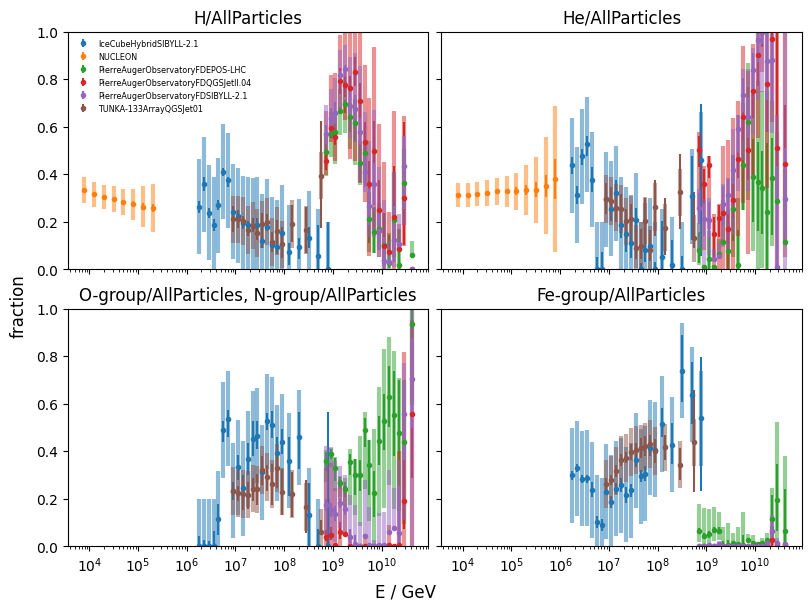

In [9]:
ratios = ("H/AllParticles", "He/AllParticles", "O-group/AllParticles", "N-group/AllParticles", "Fe-group/AllParticles")

tab = crdb.query(ratios, energy_type="ETOT", energy_convert_level=1)
tab = np.sort(tab, order=("e_mean",))

fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True, constrained_layout=True)

ratios = ("H/AllParticles", "He/AllParticles", ("O-group/AllParticles", "N-group/AllParticles"), "Fe-group/AllParticles")

for axi, ratio in zip(ax.flat, ratios):
    plt.sca(axi)
    if isinstance(ratio, tuple):
        ma = False
        for r in ratio:
            ma |= tab["quantity"] == r
    else:
        ma = tab["quantity"] == ratio
    for iexp, (exp, ma2) in enumerate(crdb.experiment_masks(tab).items()):
        t = tab[ma & ma2]
        plt.errorbar(t["e_mean"], t["value"],
                     (t["err_stat_minus"], t["err_stat_plus"]),
                     fmt=".", color=f"C{iexp}", label=exp)
        plt.errorbar(t["e_mean"], t["value"],
                     (t["err_sys_minus"], t["err_sys_plus"]),
                     fmt="none", color=f"C{iexp}", lw=3, alpha=0.5)
    plt.title(ratio if isinstance(ratio, str) else ", ".join(ratio))

ax[0,0].legend(fontsize="xx-small", frameon=False)
fig.supxlabel("E / GeV")
fig.supylabel("fraction")
plt.ylim(0, 1)
plt.semilogx();

In [10]:
for url in crdb.reference_urls(tab):
    print(url)

https://ui.adsabs.harvard.edu/abs/2014NIMPA.756...94P
https://ui.adsabs.harvard.edu/abs/2014PhRvD..90l2005A
https://ui.adsabs.harvard.edu/abs/2015ICRC...34..334R
https://ui.adsabs.harvard.edu/abs/2019AdSpR..64.2546G
